# TP2 ADM

*LAURENT Clément*

*RANDRIANTSOA Matthieu*

In [13]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Question 1 :

*Importer ce jeu de données avec la librairie pandas (c.f. read_csv)*

In [22]:
data = pd.read_csv('./villes.csv', sep=';')
X = data.iloc[:, 1:13].values
labels = data.iloc[:, 0].values

[ 3.93125   4.790625  8.125    10.875    14.35     17.73125  19.753125
 19.453125 16.903125 12.26875   7.871875  4.784375]


### Question 2 :

Réaliser une Analyse en Composantes Principales (module PCA de Scikit-learn) sur ce jeu de données
centrées réduites (StandardScaler)

#### A)

Quel est le nombre d’axes à retenir pour conserver un minimum de 90% de l’information
représentée dans le nuage initial

In [16]:
# Centrer et réduire les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer l'algorithme PCA
pca = PCA()
pca.fit(X_scaled)

# Nombre d'axes à retenir pour conserver au moins 90% de l'information
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components_90 = np.argmax(cumulative_variance_ratio >= 0.9) + 1

print("Nombre d'axes à retenir pour conserver au moins 90% de l'information:", n_components_90)


Nombre d'axes à retenir pour conserver au moins 90% de l'information: 2


##### B)

Donner une interprétation des deux premiers axes principaux

In [46]:
# Obtenir les charges des variables originales sur les deux premiers axes principaux
pc_loadings = pca.components_[:2].T

# Créer un DataFrame pour une meilleure visualisation
loadings_df = pd.DataFrame(pc_loadings, columns=['PC1', 'PC2'], index=data.columns[1:13])

print("Charges des variables originales sur les deux premiers axes principaux :")
print(loadings_df)

pca.explained_variance_ratio_

Charges des variables originales sur les deux premiers axes principaux :
            PC1       PC2
janv   0.271510  0.399335
fev    0.288462  0.299072
mars   0.301081  0.129431
avril  0.303542 -0.115306
mai    0.283531 -0.323143
juin   0.278419 -0.358468
juil   0.272903 -0.388796
aout   0.287578 -0.301013
sept   0.304720 -0.112316
oct    0.303855  0.122492
nov    0.292428  0.262695
dec    0.272955  0.386937


array([0.87268193, 0.11720602, 0.00469563, 0.00264791, 0.00113528,
       0.00050136, 0.00042289, 0.00032817, 0.00015166, 0.00011764,
       0.00008364, 0.00002786])

In [45]:
print(loadings_df.sort_values("PC1"))
print(loadings_df.sort_values("PC2"))

            PC1       PC2
janv   0.271510  0.399335
juil   0.272903 -0.388796
dec    0.272955  0.386937
juin   0.278419 -0.358468
mai    0.283531 -0.323143
aout   0.287578 -0.301013
fev    0.288462  0.299072
nov    0.292428  0.262695
mars   0.301081  0.129431
avril  0.303542 -0.115306
oct    0.303855  0.122492
sept   0.304720 -0.112316
            PC1       PC2
juil   0.272903 -0.388796
juin   0.278419 -0.358468
mai    0.283531 -0.323143
aout   0.287578 -0.301013
avril  0.303542 -0.115306
sept   0.304720 -0.112316
oct    0.303855  0.122492
mars   0.301081  0.129431
nov    0.292428  0.262695
fev    0.288462  0.299072
dec    0.272955  0.386937
janv   0.271510  0.399335


## Axe Principal 1 (PC1) :

En projection sur l'axe des abscisses grâce à la question c), nous pouvons observer que le premier axe représente la moyenne des temperatures sur l'année. En effet deux villes proches par projection auront des moyennes similaires.

## Axe Principal 2 (PC2) :

Cet axe représente la variation des temperatures l'été et l'hiver, par exemple, plus on est haut, plus on a de forte temperature l'hiver et faible l'été, plus on est bas, plus on a de forte temperature l'été et faible l'hiver. En effet si l'on prend deux villes de référence, par exemple Brest et Marseille, Brest est haut placé car les températures sont relativement faible, alors que Marseille est plus bas placé en raison d'été plus forts.

#### C)

Donner une visualisation graphique des villes projetées dans le plan
principal. 

In [18]:
X_pca = pca.transform(X)

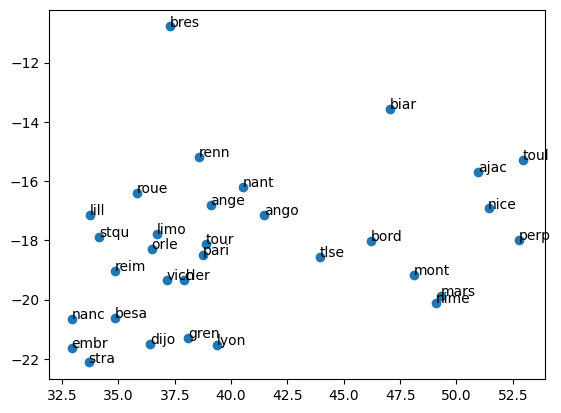

In [19]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for l, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
  plt.annotate(l, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

#### D)

Essayer d’analyser les positions et oppositions des villes sur le plan projeté. Avec les éléments que
vous avez, identifiez visuellement une typologie des états. 

À l'aide du graphique, nous pouvons observer plusieurs regroupement.

Le coin inférieur gauche :

La seconde moitié droite :

Quelques villes isolé comme Brest ou Biarritz.

In [25]:
data.head()

,ville,janv,fev,mars,avril,mai,juin,juil,aout,sept,oct,nov,dec
0,ajac,7.7,8.7,10.5,12.6,15.9,19.8,22.0,22.2,20.3,16.3,11.8,8.7
1,ange,4.2,4.9,7.9,10.4,13.6,17.0,18.7,18.4,16.1,11.7,7.6,4.9
2,ango,4.6,5.4,8.9,11.3,14.5,17.2,19.5,19.4,16.9,12.5,8.1,5.3
3,besa,1.1,2.2,6.4,9.7,13.6,16.9,18.7,18.3,15.5,10.4,5.7,2.0
4,biar,7.6,8.0,10.8,12.0,14.7,17.8,19.7,19.9,18.5,14.8,10.9,8.2


In [26]:
data.drop(columns=['ville']).mean()

janv      3.931250
fev       4.790625
mars      8.125000
avril    10.875000
mai      14.350000
juin     17.731250
juil     19.753125
aout     19.453125
sept     16.903125
oct      12.268750
nov       7.871875
dec       4.784375
dtype: float64

#### E)

Définir une fonction permettant de regrouper toutes les procédures précédentes. 

In [123]:
def apply_PCA(filepath, epsilon, pourcentage_variance=0.9):
    # Importer les données
    
    data = pd.read_csv(filepath, sep=';')
    nb_variables = data.shape[1]
    X = data.iloc[:, 1:nb_variables].values
    labels = data.iloc[:, 0].values

    # Centrer et réduire les données
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Appliquer l'Analyse en Composantes Principales (PCA)
    pca = PCA()
    pca.fit(X_scaled)

    # Nombre d'axes à retenir pour conserver au moins un certain pourcentage de la variance
    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.argmax(cumulative_variance_ratio >= pourcentage_variance) + 1

    # Projeter les données sur les composantes principales sélectionnées
    X_projected = pca.transform(X_scaled)[:, :n_components]

    # Tracer le graphique de dispersion avec annotations des noms de villes
    plt.figure(figsize=(10, 6))
    plt.scatter(X_projected[:, 0], X_projected[:, 1])
    for label, x, y in zip(labels, X_projected[:, 0], X_projected[:, 1]):
        plt.annotate(label, xy=(x, y), xytext=(-5, 5), textcoords='offset points')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f'Projection des {filepath.split('/')[-1].split('.')[0]} sur les deux premières composantes principales')
    plt.grid(True)
    plt.show()

    # Afficher la moyenne de chaque variable pour PC1 et PC2
    pc_loadings = pca.components_[:2].T
    loadings_df = pd.DataFrame(pc_loadings, columns=['PC1', 'PC2'], index=data.columns[1:nb_variables])

    print(pd.DataFrame(loadings_df.abs() > epsilon, columns=['PC1', 'PC2'], index=data.columns[1:nb_variables]))

    print("Charges des variables originales sur les deux premiers axes principaux :")
    print(loadings_df)
    return data

### Question 3 :

Appliquer la fonction précédente sur le jeu de données "crimes.csv". Il s’agit des statistiques de criminalité
dans 50 états américains. Dans chaque état, sept types de crimes ou délits sont repérés par leurs nombres
annuels de faits constatés rapportés sur 100 000 habitants : meurtres (Meurtre), enlèvements (Rapt), vols
avec violence(Vol), agressions (Attaque), viol (Viol), vols peu importants (Larcin), vols de voitures
(Auto_Theft). Interpréter et comparer les résultats obtenus pour ce Jeu de données. Avec les éléments que
vous avez, peut-on visuellement identifier une typologie des individus pour ce jeu de données.

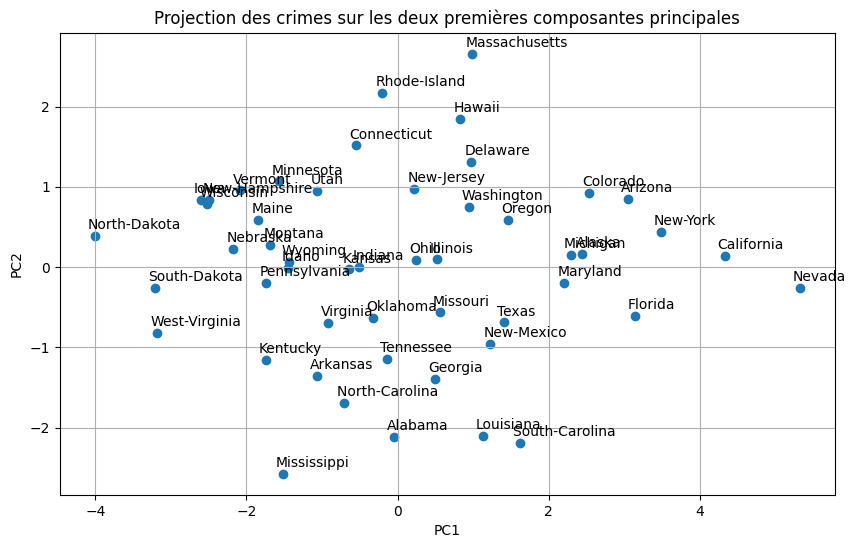

              PC1    PC2
Meutre       True   True
Rapt         True  False
Vol          True  False
Attaque      True   True
Viol         True  False
Larcin       True   True
Auto_Theft  False   True
Charges des variables originales sur les deux premiers axes principaux :
                 PC1       PC2
Meutre      0.300279 -0.629174
Rapt        0.431759 -0.169435
Vol         0.396875  0.042247
Attaque     0.396652 -0.343528
Viol        0.440157  0.203341
Larcin      0.357360  0.402319
Auto_Theft  0.295177  0.502421


In [125]:
(1/np.sqrt(8)) #0.35 => on prend 0.3

data_crimes = apply_PCA('./crimes.csv',0.3)


In [101]:
#PC1

# Calculer la moyenne pour chaque ligne (axe horizontal)
mean_values = data_crimes.iloc[:, 1:].mean(axis=1)

# Créer un DataFrame avec les moyennes et utiliser les noms des villes comme index
mean_df = pd.DataFrame(mean_values, columns=['Moyenne'])

# print(mean_df)
#comparaison des points extrêmes
print(data.iloc[27, :]) # Nevada
print(mean_df.iloc[27, :])
print(data.iloc[33, :]) # North-Dakota
print(mean_df.iloc[33, :])




Etat          Nevada
Meutre          15.8
Rapt            49.1
Vol            323.1
Attaque        355.0
Viol          2453.1
Larcin        4212.6
Auto_Theft     559.2
Name: 27, dtype: object
Moyenne    1138.271429
Name: 27, dtype: float64
Etat          North-Dakota
Meutre                 0.9
Rapt                   9.0
Vol                   13.3
Attaque               43.8
Viol                 446.1
Larcin              1843.0
Auto_Theft           144.7
Name: 33, dtype: object
Moyenne    357.257143
Name: 33, dtype: float64


In [102]:
print(data_crimes.iloc[40, :]) # South-Dakota
print(mean_df.iloc[40, :])
print(data_crimes.iloc[47, :]) # West-Virgina
print(mean_df.iloc[47, :])

Etat          South-Dakota
Meutre                 2.0
Rapt                  13.5
Vol                   17.9
Attaque              155.7
Viol                 570.5
Larcin              1704.4
Auto_Theft           147.5
Name: 40, dtype: object
Moyenne    373.071429
Name: 40, dtype: float64
Etat          West-Virginia
Meutre                  6.0
Rapt                   13.2
Vol                    42.2
Attaque                90.9
Viol                  597.4
Larcin               1341.7
Auto_Theft            163.3
Name: 47, dtype: object
Moyenne    322.1
Name: 47, dtype: float64


On observe un fort écart entre les moyennes du Nevada et North-Dakota, et un faible écart entre ceux de South-Dakota et West-Virgina. L'axe PC1 représente donc la moyenne de criminalité par état.

Concernant l'axe PC2, on remarque que les données qui ne sont en compte sont les Meurtres, Attaques, Larcins et vols de voitures

### Question 4 :

Faire de même pour le fichier "50_Startups.csv" qui comporte 50 startups américaines décrites par leurs
dépenses en termes de R&D, d’administration et de Marketing ainsi que leur Bénéfice annuel. 

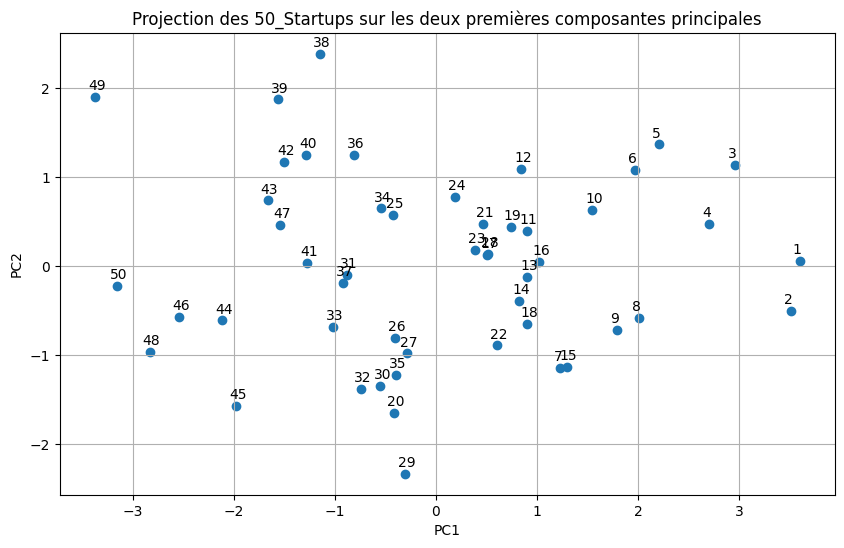

                            PC1    PC2
Depenses R&D               True  False
Depenses Administration   False   True
Depenses Marketing Spend   True  False
Benefice                   True  False
Charges des variables originales sur les deux premiers axes principaux :
                               PC1       PC2
Depenses R&D              0.593479 -0.040481
Depenses Administration   0.147379 -0.950513
Depenses Marketing Spend  0.520647  0.307971
Benefice                  0.595810  0.006321


,Id,Depenses R&D,Depenses Administration,Depenses Marketing Spend,Benefice
0,1,165349.20,136897.80,471784.10,192261.83
1,2,162597.70,151377.59,443898.53,191792.06
2,3,153441.51,101145.55,407934.54,191050.39
3,4,144372.41,118671.85,383199.62,182901.99
4,5,142107.34,91391.77,366168.42,166187.94
5,6,131876.90,99814.71,362861.36,156991.12
6,7,134615.46,147198.87,127716.82,156122.51
7,8,130298.13,145530.06,323876.68,155752.60
8,9,120542.52,148718.95,311613.29,152211.77
9,10,123334.88,108679.17,304981.62,149759.96


In [124]:
1/np.sqrt(5) # 0.45 donc 0.4

data_StartUps = apply_PCA('./50_Startups.csv',0.4)